# Spotify Dataset Cleaning and Preprocessing

There are totally 5 CSV files to clean and process. 

1. spotify_tracks_data_2023.csv
2. spotify_albums_data_2023.csv
3. spotify_artist_data_2023.csv
4. spotify_data_2023.csv
5. spotify_features_data_2023.csv

# Lets go through each csv and understand the variables present and start cleaning accordingly.

### Import the necessary python libraries

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re
import missingno as msno

## spotify_tracks_data_2023

### Step1: Convert the csv file to pandas and read the first 5 rows

In [220]:
# converting csv to pandas dataframe 
df_tracks = pd.read_csv("Spotify-Dataset\spotify_tracks_data_2023.csv")

# reading the first 5 rows
df_tracks.head()

,id,track_popularity,explicit
0,02MBhqgR7WeeI4ZfB6Lo0i,0,False
1,5j4M4gLYuUy9PVw0vsXWyq,0,False
2,46EucLPJpx0QM3SCjzzdP0,0,False
3,4nK2LvW3osgDT89S38Mcg6,0,False
4,1Pq37WIQZDG7yNFnY5IbqG,0,False


#### Column Description

1. id : The Spotify ID for the track.

2. track_popularity : The popularity of a track is a value between 0 and 100, with 100 being the most popular.

3. explicit : Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

#### Changes to be made

1. Change column name id to track_id and explicit to explicit_lyrics

2. Impute numerical values in explicit_lyrics column [0 - false/ 1 - true]

In [221]:
# change column names
df_tracks = df_tracks.rename(columns={'id': 'track_id', 'explicit' : 'explicit_lyrics'})

In [222]:
# checking if the column names are changed
df_tracks.head()

,track_id,track_popularity,explicit_lyrics
0,02MBhqgR7WeeI4ZfB6Lo0i,0,False
1,5j4M4gLYuUy9PVw0vsXWyq,0,False
2,46EucLPJpx0QM3SCjzzdP0,0,False
3,4nK2LvW3osgDT89S38Mcg6,0,False
4,1Pq37WIQZDG7yNFnY5IbqG,0,False


In [223]:
# imputing numerical values in explicit_lyrics column [0 - false/ 1 - true]
df_tracks.explicit_lyrics = df_tracks.explicit_lyrics.apply(lambda x : 1 if x == 'True' else 0)

In [224]:
# Reading the head 
df_tracks.head()

# Getting the info of the df
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438938 entries, 0 to 438937
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   track_id          438938 non-null  object
 1   track_popularity  438938 non-null  int64 
 2   explicit_lyrics   438938 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.0+ MB


{'whiskers': [<matplotlib.lines.Line2D at 0x249e6759b50>,
 'caps': [<matplotlib.lines.Line2D at 0x249e675a1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249e6759a00>],
 'medians': [<matplotlib.lines.Line2D at 0x249e67598b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249e675a960>],
 'means': []}

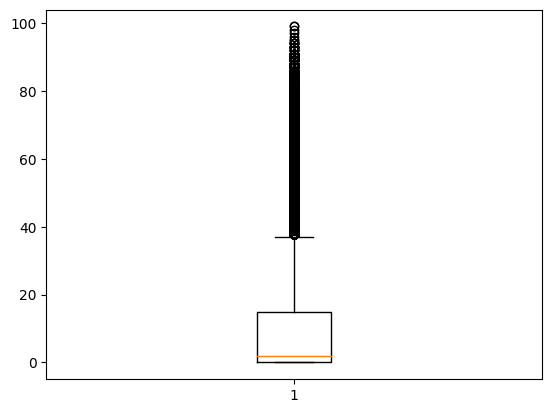

In [225]:
# Checking if track_popularity has any outliers using boxplot
plt.boxplot(df_tracks['track_popularity'])

No outliers are present in the dataframe. Every value is within 100. 

In [226]:
# checking the unique value count of track_id
df_tracks['track_id'].nunique()


438938

* It is confirmed that, there are totally 4,38,938 unique tracks

In [227]:
# checking the value count of explicit_lyrics
df_tracks['explicit_lyrics'].value_counts()

explicit_lyrics
0    438938
Name: count, dtype: int64

* It is observed that, explicit lyrics for all tracks is 0, meaning there is no lyrics available for all tracks.

* Therefore, we can drop the explicit_lyrics column as it doesn't add any value to the dataset.

In [228]:
# dropping explicit_lyrics column
df_tracks = df_tracks.drop(columns=['explicit_lyrics'], axis=1)

# getting the head of the df
df_tracks.head()

,track_id,track_popularity
0,02MBhqgR7WeeI4ZfB6Lo0i,0
1,5j4M4gLYuUy9PVw0vsXWyq,0
2,46EucLPJpx0QM3SCjzzdP0,0
3,4nK2LvW3osgDT89S38Mcg6,0
4,1Pq37WIQZDG7yNFnY5IbqG,0


In [229]:
# checking the null values 
df_tracks.isna().sum()

track_id            0
track_popularity    0
dtype: int64

## Spotify_features_data_2023

In [230]:
# Converting csv to pandas dataframe 
df_features = pd.read_csv("Spotify-Dataset\spotify_features_data_2023.csv")

# Reading the first 5 rows to know about the dataset
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.460,0.125,11,-8.094,0,0.0371,0.891,0.000,0.1650,0.275,75.639,audio_features,18r5gmlp3vQykXCskNJI0e,spotify:track:18r5gmlp3vQykXCskNJI0e,https://api.spotify.com/v1/tracks/18r5gmlp3vQy...,https://api.spotify.com/v1/audio-analysis/18r5...,89969,5
1,0.621,0.125,10,-19.686,0,0.0376,0.977,0.916,0.1040,0.321,166.048,audio_features,0zfslMAEFfuIjkgxa6tEPc,spotify:track:0zfslMAEFfuIjkgxa6tEPc,https://api.spotify.com/v1/tracks/0zfslMAEFfuI...,https://api.spotify.com/v1/audio-analysis/0zfs...,188793,4
2,0.351,0.125,6,-18.151,0,0.0421,0.985,0.927,0.0972,0.157,100.256,audio_features,0Ah41mjuPtj9TXfElZ59WK,spotify:track:0Ah41mjuPtj9TXfElZ59WK,https://api.spotify.com/v1/tracks/0Ah41mjuPtj9...,https://api.spotify.com/v1/audio-analysis/0Ah4...,191360,4
3,0.638,0.125,4,-15.454,1,0.0548,0.995,0.960,0.0883,0.240,69.976,audio_features,1HQwCt2tFgnYyPzY019ZpI,spotify:track:1HQwCt2tFgnYyPzY019ZpI,https://api.spotify.com/v1/tracks/1HQwCt2tFgnY...,https://api.spotify.com/v1/audio-analysis/1HQw...,190717,4
4,0.857,0.125,7,-18.150,1,0.4470,0.904,0.926,0.0948,0.608,159.953,audio_features,4j1lMVFE9H5Av6wxRhteSA,spotify:track:4j1lMVFE9H5Av6wxRhteSA,https://api.spotify.com/v1/tracks/4j1lMVFE9H5A...,https://api.spotify.com/v1/audio-analysis/4j1l...,213750,4


#### Dropping down few unnecessary columns

In [231]:
# columns to be dropped
drop_columns = ['key', 'acousticness', 'tempo', 'analysis_url', 'time_signature']

# dropping columns
df_features = df_features.drop(columns=drop_columns, axis=1)

In [232]:
# reading the df
df_features.head()

,danceability,energy,loudness,mode,speechiness,instrumentalness,liveness,valence,type,id,uri,track_href,duration_ms
0,0.460,0.125,-8.094,0,0.0371,0.000,0.1650,0.275,audio_features,18r5gmlp3vQykXCskNJI0e,spotify:track:18r5gmlp3vQykXCskNJI0e,https://api.spotify.com/v1/tracks/18r5gmlp3vQy...,89969
1,0.621,0.125,-19.686,0,0.0376,0.916,0.1040,0.321,audio_features,0zfslMAEFfuIjkgxa6tEPc,spotify:track:0zfslMAEFfuIjkgxa6tEPc,https://api.spotify.com/v1/tracks/0zfslMAEFfuI...,188793
2,0.351,0.125,-18.151,0,0.0421,0.927,0.0972,0.157,audio_features,0Ah41mjuPtj9TXfElZ59WK,spotify:track:0Ah41mjuPtj9TXfElZ59WK,https://api.spotify.com/v1/tracks/0Ah41mjuPtj9...,191360
3,0.638,0.125,-15.454,1,0.0548,0.960,0.0883,0.240,audio_features,1HQwCt2tFgnYyPzY019ZpI,spotify:track:1HQwCt2tFgnYyPzY019ZpI,https://api.spotify.com/v1/tracks/1HQwCt2tFgnY...,190717
4,0.857,0.125,-18.150,1,0.4470,0.926,0.0948,0.608,audio_features,4j1lMVFE9H5Av6wxRhteSA,spotify:track:4j1lMVFE9H5Av6wxRhteSA,https://api.spotify.com/v1/tracks/4j1lMVFE9H5A...,213750


#### Understanding the left out variables

1. danceability -> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

2. energy -> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

3. loudness -> The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db.

4. mode -> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

5. speechiness -> Speechiness detects the presence of spoken words in a track. 
closer to 1 - talk show, audio book, poetry
above 0.66 - Full spoken words
between 0.33 and 0.66 - rap music
below 0.33 - only music

6. instrumentalness -> Predicts whether a track contains no vocals. 

7. liveness -> Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.

8. valence -> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

#### Changes to me made

In [233]:
# changing column name "mode" to "melodic" for easy understanding
# changing "id" to "track_id"
df_features = df_features.rename(columns={'mode' : 'melodic', 'id': 'track_id'})

# reading the head
df_features.head()

,danceability,energy,loudness,melodic,speechiness,instrumentalness,liveness,valence,type,track_id,uri,track_href,duration_ms
0,0.460,0.125,-8.094,0,0.0371,0.000,0.1650,0.275,audio_features,18r5gmlp3vQykXCskNJI0e,spotify:track:18r5gmlp3vQykXCskNJI0e,https://api.spotify.com/v1/tracks/18r5gmlp3vQy...,89969
1,0.621,0.125,-19.686,0,0.0376,0.916,0.1040,0.321,audio_features,0zfslMAEFfuIjkgxa6tEPc,spotify:track:0zfslMAEFfuIjkgxa6tEPc,https://api.spotify.com/v1/tracks/0zfslMAEFfuI...,188793
2,0.351,0.125,-18.151,0,0.0421,0.927,0.0972,0.157,audio_features,0Ah41mjuPtj9TXfElZ59WK,spotify:track:0Ah41mjuPtj9TXfElZ59WK,https://api.spotify.com/v1/tracks/0Ah41mjuPtj9...,191360
3,0.638,0.125,-15.454,1,0.0548,0.960,0.0883,0.240,audio_features,1HQwCt2tFgnYyPzY019ZpI,spotify:track:1HQwCt2tFgnYyPzY019ZpI,https://api.spotify.com/v1/tracks/1HQwCt2tFgnY...,190717
4,0.857,0.125,-18.150,1,0.4470,0.926,0.0948,0.608,audio_features,4j1lMVFE9H5Av6wxRhteSA,spotify:track:4j1lMVFE9H5Av6wxRhteSA,https://api.spotify.com/v1/tracks/4j1lMVFE9H5A...,213750


In [234]:
# checking if the df has any missing values in its columns
df_features.isna().sum()

#checking unique values of all columns
df_features_cols = df_features.columns
for col in df_features_cols:
    print("Unique Value count of {} is".format(col) , df_features[col].nunique())

Unique Value count of danceability is 1333
Unique Value count of energy is 2939
Unique Value count of loudness is 33492
Unique Value count of melodic is 2
Unique Value count of speechiness is 1653
Unique Value count of instrumentalness is 5402
Unique Value count of liveness is 1779
Unique Value count of valence is 2066
Unique Value count of type is 1
Unique Value count of track_id is 438112
Unique Value count of uri is 438112
Unique Value count of track_href is 438112
Unique Value count of duration_ms is 147871


* It is observed that type has only one value. Therefore, we can drop 'type' col.

In [235]:
# dropping type col
df_features = df_features.drop(columns=['type'], axis=1)

# getting the shape
df_features.shape

(438112, 12)

## spotify_data_2023

In [236]:
# converting csv to pandas dataframe 
df_data = pd.read_csv("Spotify-Dataset\spotify_data_2023.csv")

# reading the head of df
df_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15880\1214657695.py:2: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv("Spotify-Dataset\spotify_data_2023.csv")


,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


In [237]:
# getting the column names
df_data.columns

Index(['album_id', 'album_name', 'album_popularity', 'album_type', 'artists',
       'artist_0', 'artist_1', 'artist_2', 'artist_3', 'artist_4', 'artist_id',
       'duration_sec', 'label', 'release_date', 'total_tracks', 'track_id',
       'track_name', 'track_number', 'artist_genres', 'artist_popularity',
       'followers', 'name', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence', 'explicit', 'track_popularity',
       'release_year', 'release_month', 'rn'],
      dtype='object')

In [238]:
# dropping down unnecessary columns
drop_columns_data = ['artist_0', 'artist_1', 'artist_2', 'artist_3', 'artist_4', 'label', 'name', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence', 'explicit', 'track_popularity', 'rn']

df_data = df_data.drop(columns=drop_columns_data, axis=1)

In [239]:
df_data.columns

Index(['album_id', 'album_name', 'album_popularity', 'album_type', 'artists',
       'artist_id', 'duration_sec', 'release_date', 'total_tracks', 'track_id',
       'track_name', 'track_number', 'artist_genres', 'artist_popularity',
       'followers', 'release_year', 'release_month'],
      dtype='object')

In [240]:
# checking any missing value
df_data.isna().sum()

album_id              0
album_name            1
album_popularity      0
album_type            0
artists               0
artist_id             0
duration_sec          0
release_date         22
total_tracks          0
track_id              0
track_name            5
track_number          0
artist_genres         0
artist_popularity     0
followers             0
release_year         22
release_month        22
dtype: int64

In [241]:
#getting the shape
df_data.shape

(375141, 17)

In [242]:
# getting unique track_id count
df_data['track_id'].nunique()

375141

## spotify_albums_data_2023

In [243]:
# converting csv to pandas dataframe
df_albums = pd.read_csv("Spotify-Dataset\spotify_albums_data_2023.csv")

# getting the head of the df
df_albums.head()

,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.521
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.041
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.855
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.241
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.060


In [244]:
# getting the columns
df_albums.columns

Index(['track_name', 'track_id', 'track_number', 'duration_ms', 'album_type',
       'artists', 'total_tracks', 'album_name', 'release_date', 'label',
       'album_popularity', 'album_id', 'artist_id', 'artist_0', 'artist_1',
       'artist_2', 'artist_3', 'artist_4', 'artist_5', 'artist_6', 'artist_7',
       'artist_8', 'artist_9', 'artist_10', 'artist_11', 'duration_sec'],
      dtype='object')

In [245]:
# dropping down unnecessary columns
drop_columns_albums = ['artist_0', 'artist_1',
       'artist_2', 'artist_3', 'artist_4', 'artist_5', 'artist_6', 'artist_7',
       'artist_8', 'artist_9', 'artist_10', 'artist_11', 'label', 'artists']

df_albums = df_albums.drop(columns=drop_columns_albums, axis=1)

In [246]:
# checking the columns again
df_albums.columns

Index(['track_name', 'track_id', 'track_number', 'duration_ms', 'album_type',
       'total_tracks', 'album_name', 'release_date', 'album_popularity',
       'album_id', 'artist_id', 'duration_sec'],
      dtype='object')

In [247]:
# checking for null vales
df_albums.isna().sum()

track_name           5
track_id             0
track_number         0
duration_ms          0
album_type           0
total_tracks         0
album_name           1
release_date        23
album_popularity     0
album_id             0
artist_id            0
duration_sec         0
dtype: int64

In [248]:
# checking the unique track_id count
df_albums['track_id'].nunique()

438948

## spotify_artist_data_2023

In [249]:
# converting csv to pandas dataframe
df_artists = pd.read_csv("Spotify-Dataset\spotify_artist_data_2023.csv") 

# getting the head of the dataframe
df_artists.head()

,id,name,artist_popularity,artist_genres,followers,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,['minneapolis punk'],184,minneapolis punk,NaN,NaN,NaN,NaN,NaN,NaN
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,['antiviral pop'],491,antiviral pop,NaN,NaN,NaN,NaN,NaN,NaN
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,['8d'],56,8d,NaN,NaN,NaN,NaN,NaN,NaN
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,['action rock'],394,action rock,NaN,NaN,NaN,NaN,NaN,NaN
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,['tribute'],230,tribute,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
# getting the columns
df_artists.columns

Index(['id', 'name', 'artist_popularity', 'artist_genres', 'followers',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6'],
      dtype='object')

In [251]:
# dropping down unnecessary columns
drop_columns_artists = ['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6']

df_artists = df_artists.drop(columns=drop_columns_artists, axis=1)

In [252]:
# checking for null values
df_artists.isna().sum()

id                   0
name                 0
artist_popularity    0
artist_genres        0
followers            0
dtype: int64

In [253]:
# changing column names for easy readability
df_artists = df_artists.rename(columns={'id': 'artist_id', 'name': 'artist_name', 'followers': 'artist_followers'})

In [254]:
# checking the head of the df
df_artists.head()

,artist_id,artist_name,artist_popularity,artist_genres,artist_followers
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,['minneapolis punk'],184
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,['antiviral pop'],491
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,['8d'],56
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,['action rock'],394
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,['tribute'],230


In [255]:
# getting shape of the df
df_artists.shape

(37012, 5)

## Merging datasets

* It is observed that "df_data" has less tracking id, compared to other dataset. 

* Therefore, we can first merge df_tracks with df_ablums.

* The resultant merged data-frame can be again merged with df_features, and then again with df_artists.

In [256]:
# merging df_tracks with df_albums using track_id
df1 = df_tracks.merge(df_albums, on ='track_id')

# checking the cols of df1
df1.columns

Index(['track_id', 'track_popularity', 'track_name', 'track_number',
       'duration_ms', 'album_type', 'total_tracks', 'album_name',
       'release_date', 'album_popularity', 'album_id', 'artist_id',
       'duration_sec'],
      dtype='object')

In [257]:
# checking shape of the df1
df1.shape

(438963, 13)

In [258]:
# checking null values of df1
df1.isna().sum()

track_id             0
track_popularity     0
track_name           5
track_number         0
duration_ms          0
album_type           0
total_tracks         0
album_name           1
release_date        23
album_popularity     0
album_id             0
artist_id            0
duration_sec         0
dtype: int64

In [259]:
# merging df1 with df_features using track_id
df2 = df1.merge(df_features, on ='track_id')

# getting df2 shape
df2.shape

(438127, 24)

In [260]:
#checking teh columns
df2.columns

Index(['track_id', 'track_popularity', 'track_name', 'track_number',
       'duration_ms_x', 'album_type', 'total_tracks', 'album_name',
       'release_date', 'album_popularity', 'album_id', 'artist_id',
       'duration_sec', 'danceability', 'energy', 'loudness', 'melodic',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'uri',
       'track_href', 'duration_ms_y'],
      dtype='object')

In [261]:
# merging df2 with df_artists using artist_id
df_final = df2.merge(df_artists, on ='artist_id')

# getting the shape of df_final
df_final.shape

(438127, 28)

In [262]:
# checking the null values of final df
df_final.isnull().sum()

track_id              0
track_popularity      0
track_name            5
track_number          0
duration_ms_x         0
album_type            0
total_tracks          0
album_name            1
release_date         23
album_popularity      0
album_id              0
artist_id             0
duration_sec          0
danceability          0
energy                0
loudness              0
melodic               0
speechiness           0
instrumentalness      0
liveness              0
valence               0
uri                   0
track_href            0
duration_ms_y         0
artist_name           0
artist_popularity     0
artist_genres         0
artist_followers      0
dtype: int64

* Since, the null value count is very minimal, we can simply remove / drop rows with null values.

In [263]:
# dropping null value rows
df_final = df_final.dropna(axis=0)

In [264]:
# getting final shape of the df
df_final.shape

(438099, 28)

In [265]:
# checking the null values again
df_final.isna().sum()

track_id             0
track_popularity     0
track_name           0
track_number         0
duration_ms_x        0
album_type           0
total_tracks         0
album_name           0
release_date         0
album_popularity     0
album_id             0
artist_id            0
duration_sec         0
danceability         0
energy               0
loudness             0
melodic              0
speechiness          0
instrumentalness     0
liveness             0
valence              0
uri                  0
track_href           0
duration_ms_y        0
artist_name          0
artist_popularity    0
artist_genres        0
artist_followers     0
dtype: int64

In [266]:
# removing the col "duration_ms_x" and "duration_ms_y" as duration_sec is present
df_final = df_final.drop(columns=['duration_ms_x', 'duration_ms_y'], axis=1)

In [267]:
# changing the dtype of release_date column
df_final['release_date'] = pd.to_datetime(df_final['release_date'])

In [268]:
# re-checking the dtype of release_data column
df_final['release_date'].dtype

datetime64[ns, UTC]

In [269]:
# from 'release_data' column, extracting month and year as separate column
df_final['release_month'] = df_final['release_date'].dt.month
df_final['release_year'] = df_final['release_date'].dt.year

In [ ]:
# changing the data type of duration_sec from float to int
df_final['duration_sec'] = df_final['duration_sec'].astype(int)

In [ ]:
# checking the changed dtype
df_final['duration_sec'].dtype

dtype('int32')

In [ ]:
# converting 'duration_sec' to 'duration_mins'
df_final['duration_min'] = df_final['duration_sec'].apply(lambda x : np.round(x/60, 2))

In [ ]:
# dropping duration_sec column
df_final = df_final.drop(columns=['duration_sec'], axis=1)

In [287]:
# re-ordering the columns for easy readability
df_final_cols_order = ['track_id',  'track_name', 'track_number', 'track_popularity', 'duration_min', 'uri', 
                       'track_href','album_id', 'album_name', 'album_type', 'album_popularity', 'total_tracks',  
                       'release_date', 'release_month', 'release_year', 
                       'artist_id', 'artist_name', 'artist_popularity', 'artist_genres', 'artist_followers', 
                       'danceability', 'energy', 'loudness', 'melodic', 'speechiness', 'instrumentalness', 
                       'liveness', 'valence']

df_final = df_final[df_final_cols_order]

In [290]:
# final processed dataframe
df_final.columns

# exporting the final processed df to csv file
df_final.to_csv('spotify_final_dataset_2023.csv', index=False, encoding='utf-8')

In [291]:
# getting shape of the final df
df_final.shape

(438099, 28)

## Preparing dataset for kafka and AWS 

#### Tracks

In [303]:
# checking df_tracks
df_tracks.shape

# exporting the df_tracks to csv
df_tracks.to_csv("spotify_tracks.csv", index=False, encoding='utf-8')

#### Albums

In [ ]:
# converting duration secs to mins
df_albums['duration_min'] = df_albums['duration_sec'].apply(lambda x : np.round(x/60, 2))

# dropping out duplicated cols
df_albums = df_albums.drop(columns=['duration_ms', 'duration_sec'], axis=1)

In [305]:
df_albums.columns

# exporting the df_albums to csv
df_albums.to_csv("spotify_albums.csv", index=False, encoding='utf-8')

#### Features

In [ ]:
# checking the columns
df_features.columns

Index(['danceability', 'energy', 'loudness', 'melodic', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'track_id', 'uri',
       'track_href', 'duration_ms'],
      dtype='object')

In [ ]:
# dropping out duplicated columns
df_features = df_features.drop(columns=['duration_ms'], axis=1)

In [306]:
# exporting the df_features to csv
df_features.to_csv("spotify_features.csv", index=False, encoding='utf-8')

#### Artists

In [307]:
# checking the columns
df_artists.columns

# exporting the df_albums to csv
df_artists.to_csv("spotify_artists.csv", index=False, encoding='utf-8')